In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("news.csv",encoding='latin1')

In [3]:
df.head()

,text,subject,fake
0,Donald Trump just couldn t wish all Americans ...,News,1
1,House Intelligence Committee Chairman Devin Nu...,News,1
2,"On Friday, it was revealed that former Milwauk...",News,1
3,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis used his annual Christmas Day mes...,News,1


In [4]:
df.shape

(408, 3)

In [5]:
#to show null values in given dataset
df.isnull().sum()

text       0
subject    0
fake       0
dtype: int64

In [6]:
df['subject'].value_counts()

News               102
politics           102
Government News    102
US_News            102
Name: subject, dtype: int64

In [7]:
#to remove unwanted columns from given  dataframe df
#first create a list for unwanted columns
L=["subject"]
#next delete unwanted columns wbich hold on list L permanantly from dataframe
df.drop(L,inplace=True,axis=1)
df.head()

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [8]:
#how many samples fake message
df['fake'].value_counts()

1    204
0    204
Name: fake, dtype: int64

In [9]:
!pip install wordcloud

In [10]:
#create wordcloud for fake mesaage
from wordcloud import WordCloud,STOPWORDS

In [11]:
#to show those records whose message is fake(1)
df[df["fake"]==1]

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
199,Tune in to the Alternate Current Radio Network...,1
200,Shawn Helton 21st Century WireWhen looking at...,1
201,Antifa (Photo: Twitter)Diana Johnstone 21st C...,1
202,"TWO PROTAGONISTS: Jesus Campos, and alleged sh...",1


In [12]:
#first join all 'fake(1)' message
x=''.join(df[df["fake"]==1]['text']) #to show all spam message
print(x)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [13]:
#create a wordcloud for 'fake' message which hold in x in paragraph format
#first create a object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

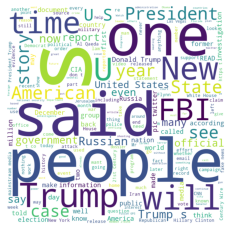

In [14]:
wc.generate(x)  #not include stopwords
#here create image of wordcloud and hold in object wc
#to show image of wordcloud
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
#to show those records whose message is fake(0)
df[df["fake"]==0]

,text,fake
204,Donald Trump just couldn t wish all Americans ...,0
205,House Intelligence Committee Chairman Devin Nu...,0
206,"On Friday, it was revealed that former Milwauk...",0
207,"On Christmas day, Donald Trump announced that ...",0
208,Pope Francis used his annual Christmas Day mes...,0
...,...,...
403,Tune in to the Alternate Current Radio Network...,0
404,Shawn Helton 21st Century WireWhen looking at...,0
405,Antifa (Photo: Twitter)Diana Johnstone 21st C...,0
406,"TWO PROTAGONISTS: Jesus Campos, and alleged sh...",0


In [16]:
#first join all 'fake' message
y=''.join(df[df["fake"]==0]['text']) 
print(y)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [17]:
#create a wordcloud for 'not spam' message which hold in x in paragraph format
#first create a object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10)

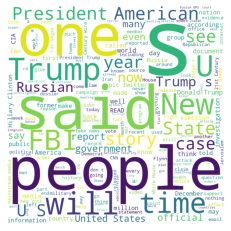

In [18]:
wc.generate(y)  #not include stopwords
#here create image of wordcloud and hold in object wc
#to show image of wordcloud
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
#call word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [20]:
#first in NLP :- apply preprocessing on text means clean the text
#create a user define function
def clean_text(txt):
    #first converts given text in lower case, using inbuilt function lower()
    txt=txt.lower()
    #print(txt)
    #second, apply tokenizer on given sentence or text
    tokens=word_tokenize(txt)
    #print(tokens)
    #filtering only alphabets, use inbuilt function isalpha() means only retrieve alphabets 
    #from given paragraph and remove all numbers and any special characters from given paragraph or message
    word_tokens=[w for w in tokens if w.isalpha()]
    #print(word_tokens)
    #next remove all stopwords, inbuilt stopwords in NLP
    #call list of inbuilts stopwords
    #stopwords inbuilt class
    stop=stopwords.words('english')
    clean_tokens=[w for w in word_tokens if w not in stop]
    #print(clean_tokens)
    #next step: apply lemmatization on clean_tokens list
    #create object of WordNetLemmatizer() class
    lemma= WordNetLemmatizer() 
    lemma_token=[lemma.lemmatize(w) for w in clean_tokens]
    #print(lemma_token)
    return ' '.join(lemma_token)

In [21]:
#call function clean_text on message input column from df dataframe
df['text']=df['text'].apply(clean_text)
#input.apply(user defined function)

In [22]:
df.head()

,text,fake
0,donald trump wish american happy new year leav...,1
1,house intelligence committee chairman devin nu...,1
2,friday revealed former milwaukee sheriff david...,1
3,christmas day donald trump announced would bac...,1
4,pope francis used annual christmas day message...,1


In [23]:
#select input and output from dataset df
x=df["text"]   #select input
y=df["fake"]  #output variable

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
403    0
404    0
405    0
406    0
407    0
Name: fake, Length: 408, dtype: int64

In [25]:
#apply LabelEncoder for output variable y
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
x

0      donald trump wish american happy new year leav...
1      house intelligence committee chairman devin nu...
2      friday revealed former milwaukee sheriff david...
3      christmas day donald trump announced would bac...
4      pope francis used annual christmas day message...
                             ...                        
403    tune alternate current radio network acr anoth...
404    shawn helton century wirewhen looking deeply e...
405    antifa photo twitter diana johnstone century w...
406    two protagonist jesus campos alleged shooter s...
407    latest move america notorious transportation s...
Name: text, Length: 408, dtype: object

In [27]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
x_train.shape,x_test.shape

((285,), (123,))

In [29]:
x_train.head()

39     donald trump spent portion sunday presumably c...
277    need another rino carpetbagger mitt romney try...
256    protect every government building public venue...
292    barbra streisand obama sycophant one corrupt c...
358    looking back presidential election chorus deni...
Name: text, dtype: object

In [30]:
#secondly, we are trying the second technique TFIDF vectorizer
#to converts text into number
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#create object of TfidfVectorizer class
tf=TfidfVectorizer()

In [32]:
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)

In [33]:
pd.DataFrame(x_train_tf.toarray(),columns=tf.get_feature_names())

,aaron,abaaoud,abandon,abbe,abbottabad,abc,abcpolitics,abdel,abdelhakim,abdelhamid,...,zeak,zealand,zealous,zero,zia,zimdars,zimmer,zionist,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.173095,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
281,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
282,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101728
283,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [34]:
#perform the model with DecisionTreeClassifier algorithm
from sklearn.tree import DecisionTreeClassifier
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()   #by default gini index

In [35]:
#train the model with 70% data
dt.fit(x_train_tf,y_train)

DecisionTreeClassifier()

In [36]:
#test the model with 30% data
y_pred=dt.predict(x_test_tf)

In [37]:
#print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.21      0.19      0.20        68
           1       0.11      0.13      0.12        55

    accuracy                           0.16       123
   macro avg       0.16      0.16      0.16       123
weighted avg       0.17      0.16      0.16       123



In [39]:
print(confusion_matrix(y_test,y_pred))

[[13 55]
 [48  7]]
